In [18]:
!pip install numpy gwpy h5py scipy

In [2]:
import numpy as np
from gwpy.timeseries import TimeSeries
import h5py
import matplotlib.pyplot as plt

filename = "../L-L1_GWOSC_16KHZ_R1-1266616125-4096.hdf5"

In [3]:
with h5py.File(filename, "r") as f:
    strain_data = f["strain/Strain"][:]

In [9]:
CHUNK_SIZE = 4096
fft_chunk = []

for s in range(0, len(strain_data)-CHUNK_SIZE, CHUNK_SIZE // 2):
    chunk = strain_data[s:s+CHUNK_SIZE] * np.hanning(CHUNK_SIZE)
    fft_chunk.append(10 * np.log10(np.abs(np.fft.rfft(chunk))))

spectro_data = np.array(fft_chunk).T

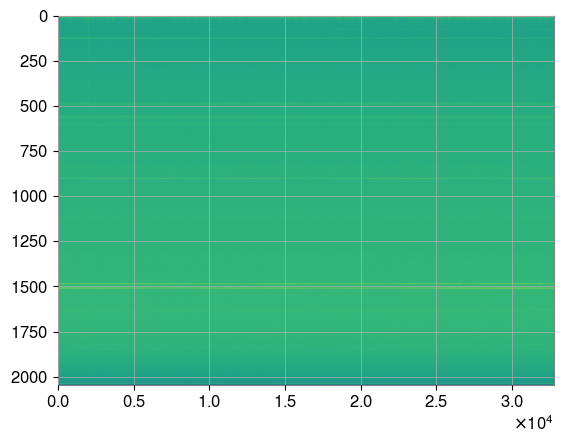

In [10]:
plt.imshow(spectro_data, aspect="auto")